In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import random



In [2]:
path = "./rnd/2013-7"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame

,Timestamp [ms],\tCPU cores,\tCPU capacity provisioned [MHZ],\tCPU usage [MHZ],\tCPU usage [%],\tMemory capacity provisioned [KB],\tMemory usage [KB],\tDisk read throughput [KB/s],\tDisk write throughput [KB/s],\tNetwork received throughput [KB/s],\tNetwork transmitted throughput [KB/s]
0,1372629804,2,5851.998900,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
1,1372630104,2,5851.998900,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000
2,1372630404,2,5851.998900,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667
3,1372630704,2,5851.998900,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000
4,1372631004,2,5851.998900,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
3890445,1375220257,2,5199.998626,77.999979,1.500000,8359936.0,1.398080e+05,0.000000,9.333333,4.533333,0.000000
3890446,1375220557,2,5199.998626,83.199978,1.600000,8359936.0,1.006624e+05,0.000000,9.466667,4.400000,0.000000
3890447,1375220857,2,5199.998626,81.466645,1.566667,8359936.0,1.342163e+05,0.000000,10.000000,4.466667,0.000000
3890448,1375221157,2,5199.998626,83.199978,1.600000,8359936.0,8.388560e+04,0.000000,9.266667,4.333333,0.000000


In [4]:
frame.columns = frame.columns.str.replace("\t", "")

In [5]:
frame.dtypes

Timestamp [ms]                             int64
CPU cores                                  int64
CPU capacity provisioned [MHZ]           float64
CPU usage [MHZ]                          float64
CPU usage [%]                            float64
Memory capacity provisioned [KB]         float64
Memory usage [KB]                        float64
Disk read throughput [KB/s]              float64
Disk write throughput [KB/s]             float64
Network received throughput [KB/s]       float64
Network transmitted throughput [KB/s]    float64
dtype: object

In [6]:
frame["Timestamp [ms]"].nunique()

36838

In [7]:
frame[frame["Timestamp [ms]"] == 1372629804]

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1372629804,2,5851.998900,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
8260,1372629804,1,2599.999299,46.799987,1.800000,2097152.0,2.558496e+05,0.133333,9.333333,0.666667,4.533333
16509,1372629804,2,5199.999202,93.599986,1.800000,8357888.0,1.062549e+05,0.000000,10.066667,4.333333,0.000000
24755,1372629804,2,5199.998598,83.199978,1.600000,1562624.0,1.118467e+05,0.000000,9.800000,4.333333,0.000000
33004,1372629804,4,11703.997336,181.411959,1.550000,16703488.0,1.342176e+05,0.000000,12.466667,4.466667,0.066667
...,...,...,...,...,...,...,...,...,...,...,...
3849183,1372629804,2,5199.997934,481.866475,9.266667,8364032.0,4.529835e+05,2883.200000,102.400000,120.666667,670.000000
3857437,1372629804,2,5199.997934,3151.198748,60.600000,8357888.0,4.171933e+06,11028.000000,29.769231,43.000000,3930.533333
3865691,1372629804,2,5199.999240,116.133316,2.233333,8359936.0,2.013256e+05,0.466667,91.733333,10.533333,8.200000
3873943,1372629804,2,5199.998604,90.133309,1.733333,8357888.0,1.621779e+05,0.000000,9.933333,4.266667,0.000000


In [8]:
frame["Timestamp [ms]"].unique()

array([1372629804, 1372630104, 1372630404, ..., 1375220974, 1375221274,
       1375221574])

In [9]:
grouped_data = frame.groupby("Timestamp [ms]", as_index=False).count()

In [10]:
grouped_data

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1372629804,425,425,425,425,425,425,425,425,425,425
1,1372630104,425,425,425,425,425,425,425,425,425,425
2,1372630404,425,425,425,425,425,425,425,425,425,425
3,1372630704,425,425,425,425,425,425,425,425,425,425
4,1372631004,425,425,425,425,425,425,425,425,425,425
...,...,...,...,...,...,...,...,...,...,...,...
36833,1375221337,2,2,2,2,2,2,2,2,2,2
36834,1375221457,500,500,500,500,500,500,500,500,500,500
36835,1375221545,8,8,8,8,8,8,8,8,8,8
36836,1375221572,2,2,2,2,2,2,2,2,2,2


<AxesSubplot:xlabel='Timestamp [ms]', ylabel='CPU cores'>

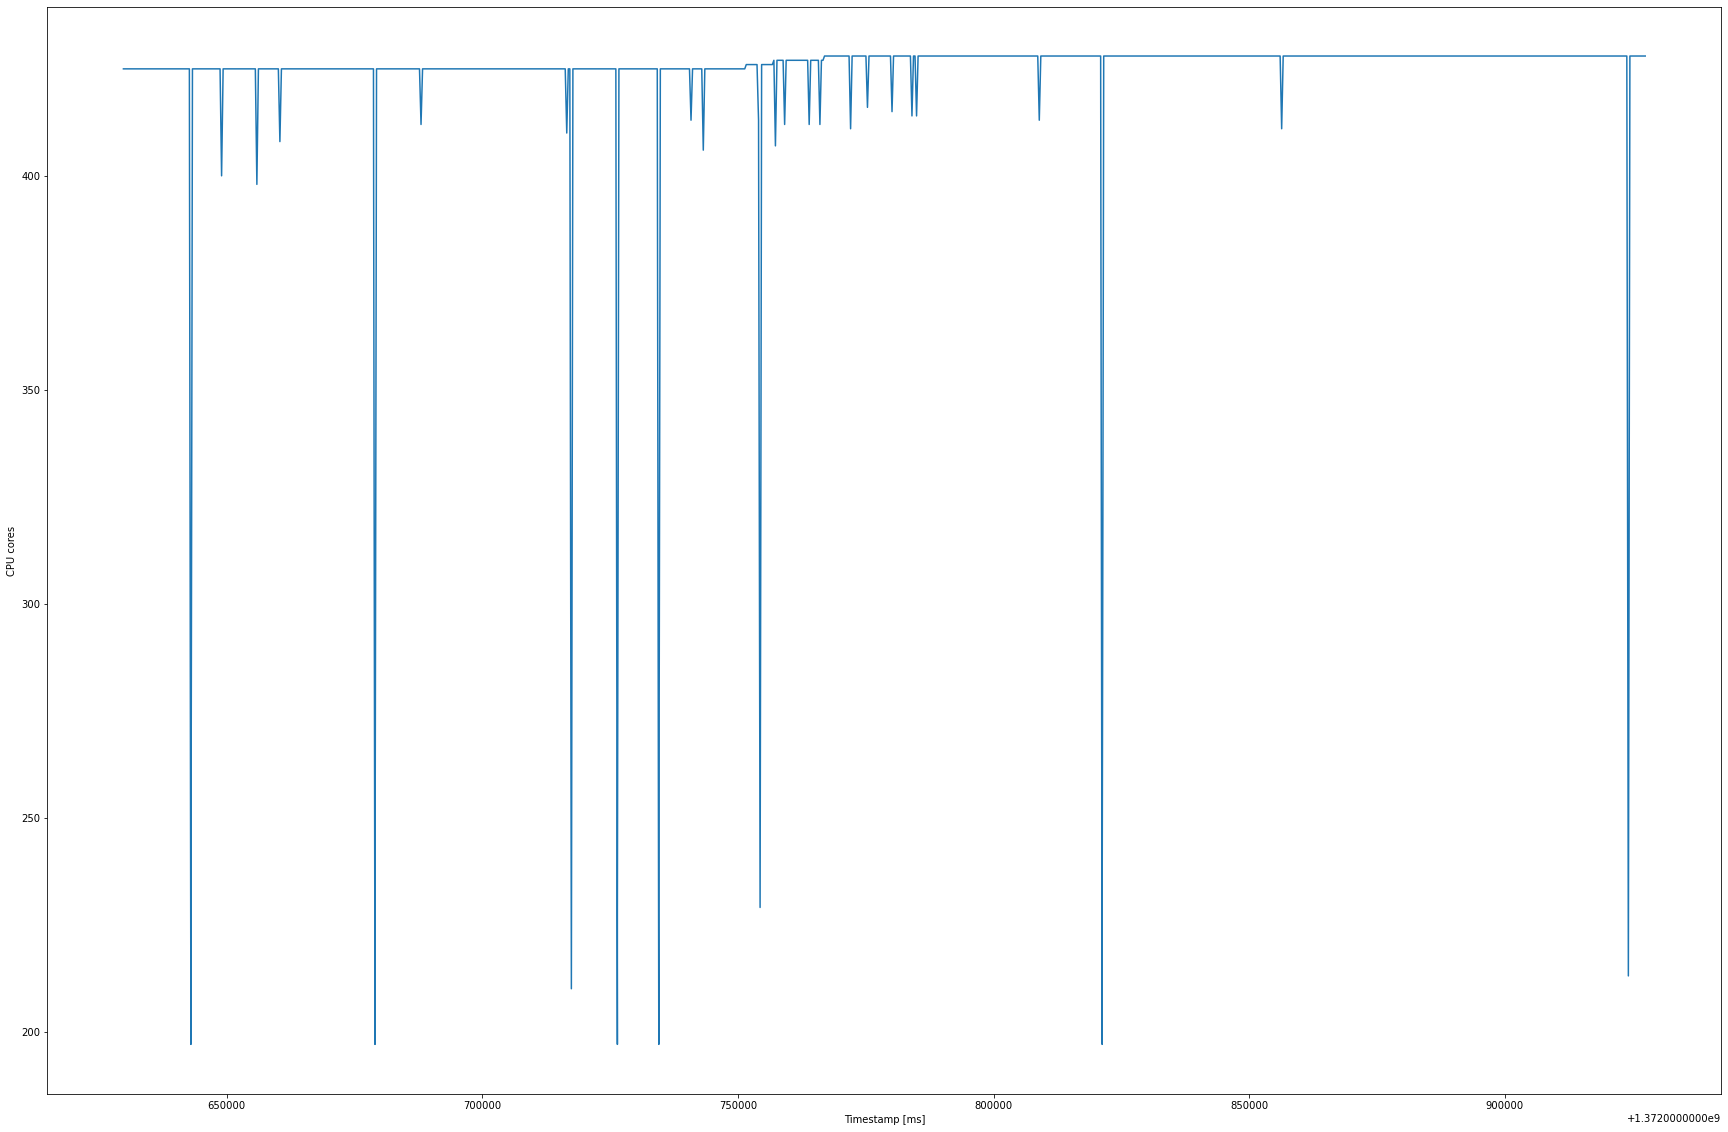

In [11]:
plt.figure(figsize=(30, 20))
sns.lineplot(x=grouped_data["Timestamp [ms]"][0:1000], y=grouped_data["CPU cores"][0:1000])

<AxesSubplot:xlabel='Timestamp [ms]', ylabel='CPU cores'>

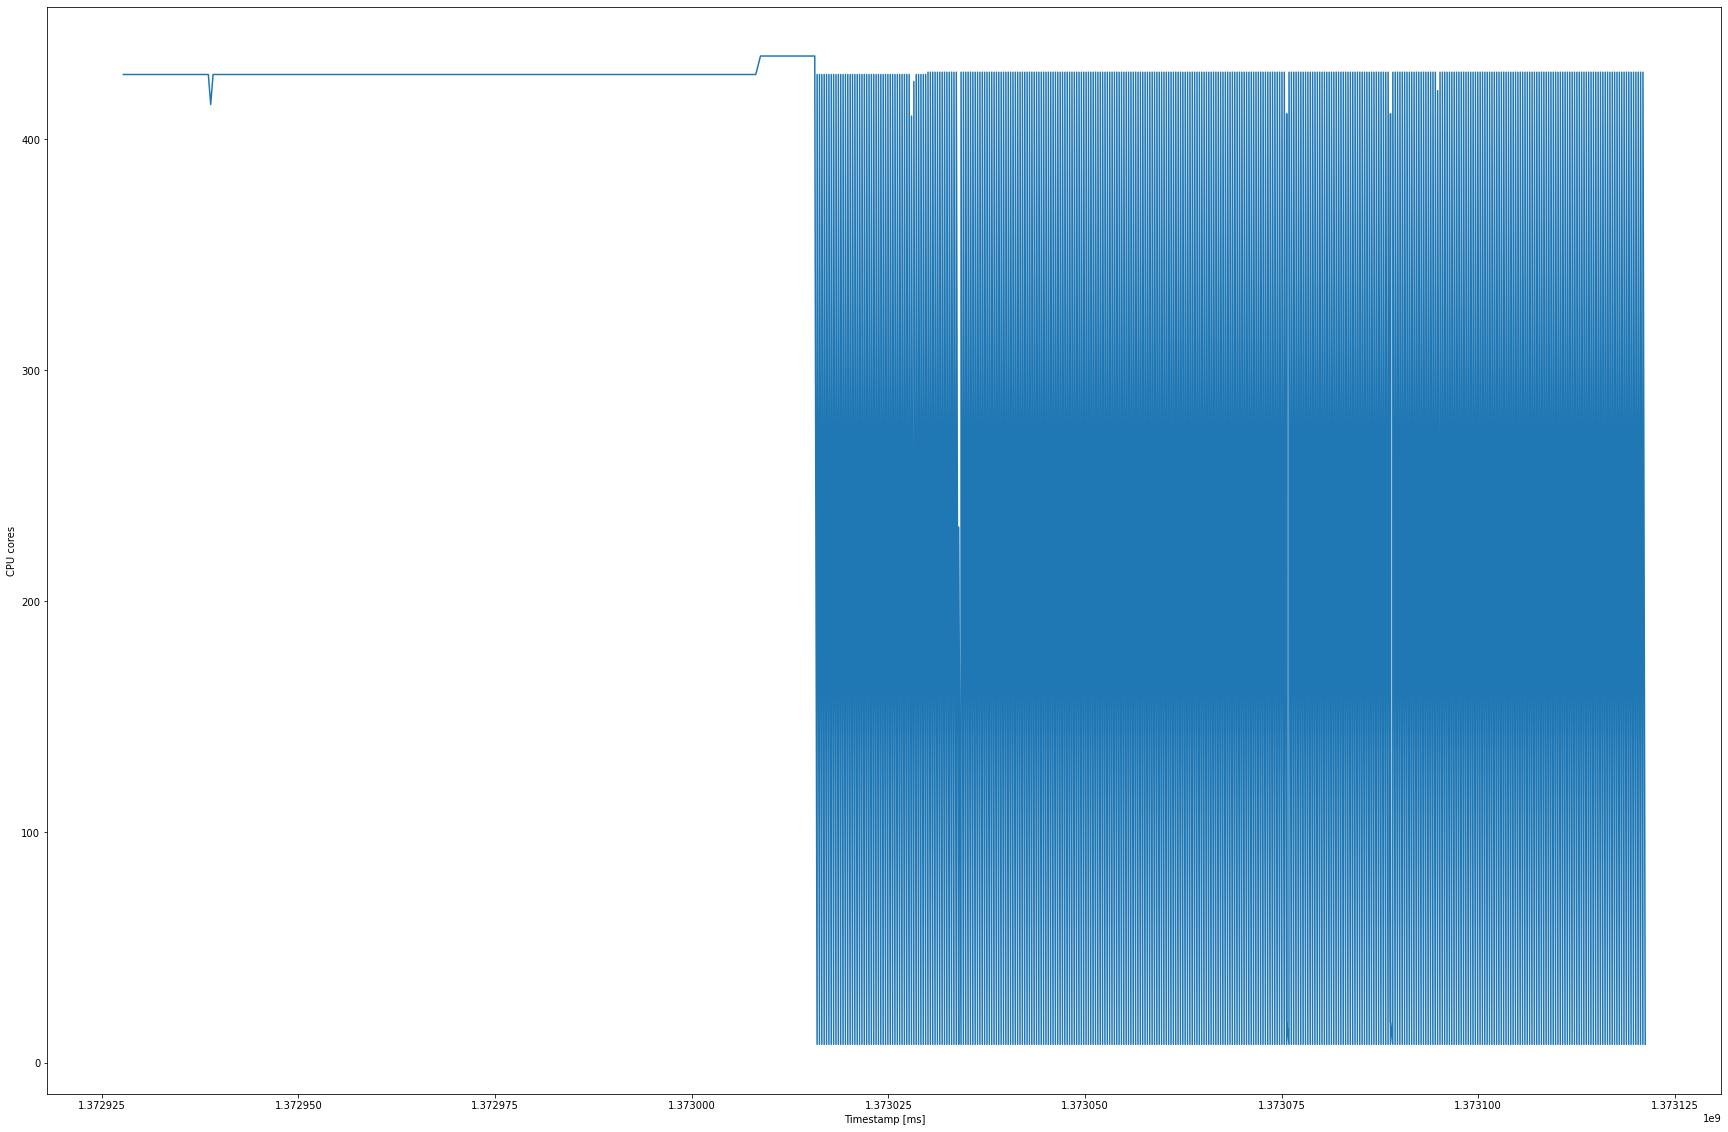

In [12]:
plt.figure(figsize=(30, 20))
sns.lineplot(x=grouped_data["Timestamp [ms]"][1000:2000], y=grouped_data["CPU cores"][1000:2000])

In [13]:
grouped_data_sum = frame.groupby("Timestamp [ms]", as_index=False).mean()

In [14]:
grouped_data_sum

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1372629804,2.752941,7474.545346,298.171108,3.574106,9.551320e+06,319447.628549,103.856784,134.086673,51.464314,59.138353
1,1372630104,2.752941,7474.545346,291.959066,3.462391,9.551322e+06,348589.162667,128.117804,76.950118,32.200314,61.030902
2,1372630404,2.752941,7474.545346,296.955028,3.430962,9.551325e+06,381487.319216,118.836728,104.890286,33.657098,62.383373
3,1372630704,2.752941,7474.545345,296.525340,3.448871,9.551325e+06,367021.886745,103.984796,78.734983,36.180588,64.324275
4,1372631004,2.752941,7474.545345,353.987547,4.108980,9.551336e+06,366842.428235,128.944392,88.973255,34.996392,67.037725
...,...,...,...,...,...,...,...,...,...,...,...
36833,1375221337,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
36834,1375221457,2.800000,7557.995292,338.076232,3.344755,8.793275e+06,380844.588876,89.179362,89.384010,24.879552,27.739952
36835,1375221545,0.000000,0.000000,0.000000,0.062500,0.000000e+00,0.000000,0.000000,0.016667,0.000000,0.000000
36836,1375221572,1.000000,2925.999516,29.259995,1.000000,1.042432e+06,16774.400000,0.000000,45.800000,0.000000,0.000000


In [15]:
path = "./rnd/2013-7"
all_files = glob.glob(path + "/*.csv")

li = []

i = 0

for filename in all_files:
    i += 1
    if i < 250:
        df = pd.read_csv(filename, index_col=None, header=0, delimiter=";")
        li.append(df)

        df = pd.concat(li, axis=0, ignore_index=True)
    else:
        break

In [16]:
df

,Timestamp [ms],\tCPU cores,\tCPU capacity provisioned [MHZ],\tCPU usage [MHZ],\tCPU usage [%],\tMemory capacity provisioned [KB],\tMemory usage [KB],\tDisk read throughput [KB/s],\tDisk write throughput [KB/s],\tNetwork received throughput [KB/s],\tNetwork transmitted throughput [KB/s]
0,1372629804,2,5851.998900,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
1,1372630104,2,5851.998900,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000
2,1372630404,2,5851.998900,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667
3,1372630704,2,5851.998900,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000
4,1372631004,2,5851.998900,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
1892921,1375220257,1,2925.999538,44.865326,1.533333,15360000.0,1.118480e+05,134.266667,35.266667,1.733333,0.000000
1892922,1375220557,1,2925.999538,39.013327,1.333333,15360000.0,7.829360e+04,197.666667,35.266667,1.800000,0.000000
1892923,1375220857,1,2925.999538,42.914660,1.466667,15360000.0,3.579136e+05,222.066667,49.400000,2.000000,0.200000
1892924,1375221157,1,2925.999538,40.963994,1.400000,15360000.0,3.467288e+05,134.266667,43.000000,9.533333,0.133333


In [17]:
df.columns = df.columns.str.replace("\t", "")

In [18]:
grouped_data = df.groupby("Timestamp [ms]", as_index=False).mean()

Text(0.5, 1.0, 'Average Memory usage and Memory capacity provisioned')

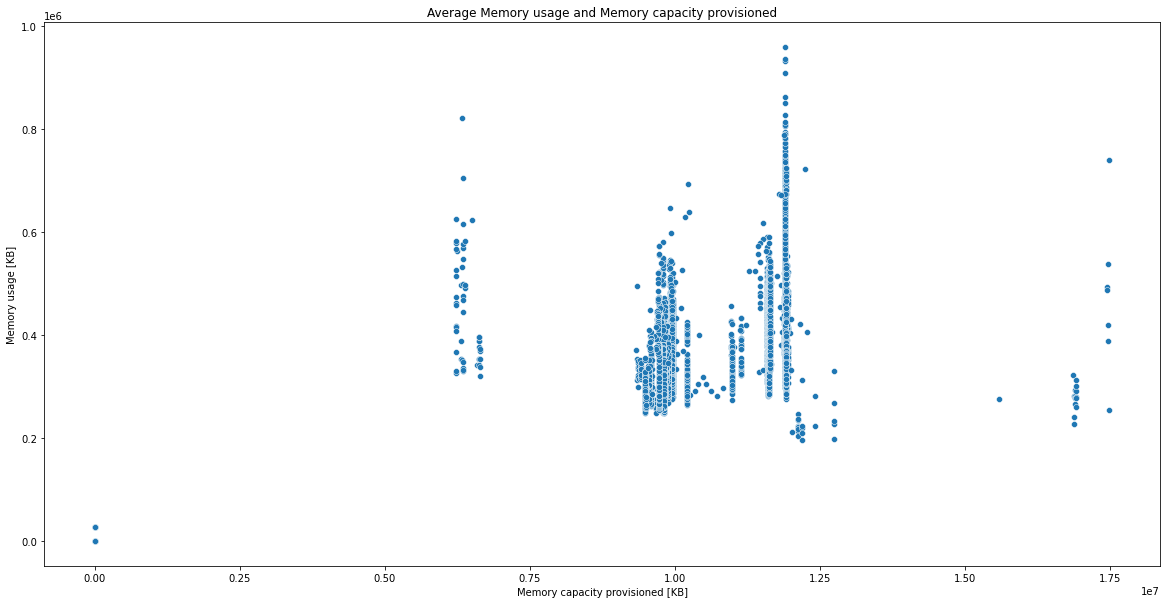

In [19]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=grouped_data["Memory capacity provisioned [KB]"], y=grouped_data["Memory usage [KB]"])
plt.title("Average Memory usage and Memory capacity provisioned")

Text(0.5, 1.0, 'Average CPU usage and CPU capacity provisioned')

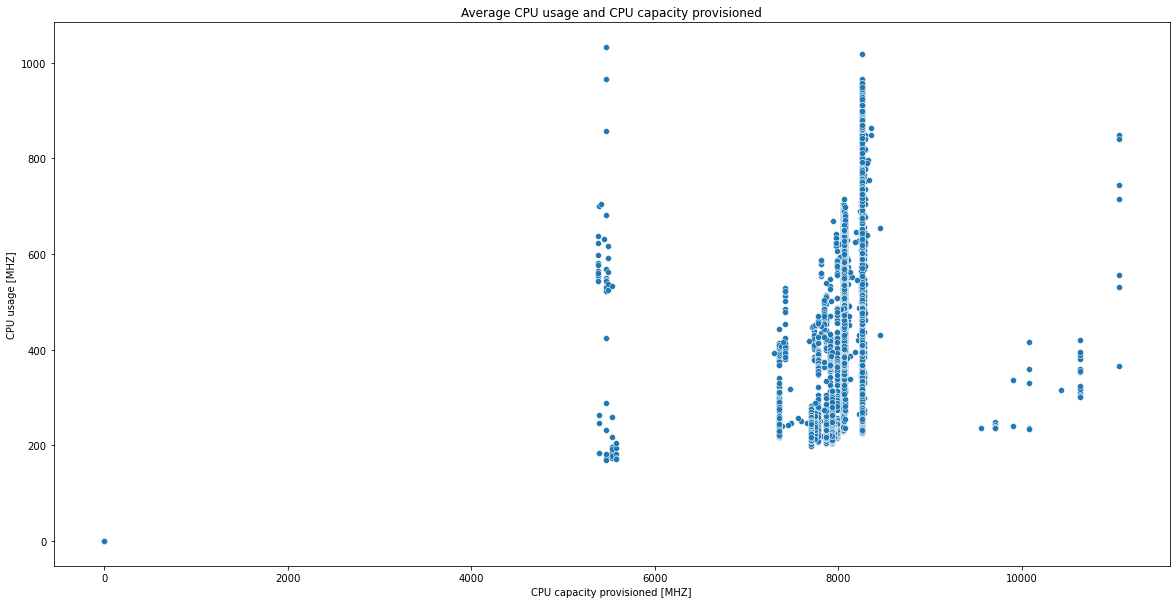

In [20]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=grouped_data["CPU capacity provisioned [MHZ]"], y=grouped_data["CPU usage [MHZ]"])
plt.title("Average CPU usage and CPU capacity provisioned")

Text(0.5, 1.0, 'Average CPU usage for 250 VMs')

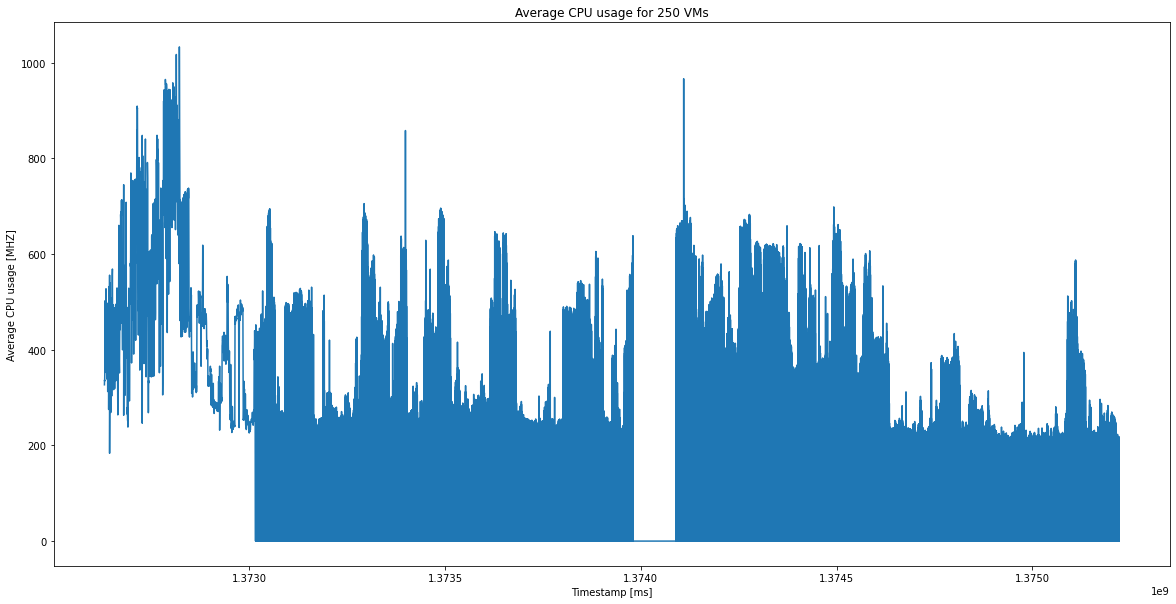

In [21]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=grouped_data["Timestamp [ms]"], y=grouped_data["CPU usage [MHZ]"])
plt.ylabel("Average CPU usage [MHZ]")
plt.title("Average CPU usage for 250 VMs")

Text(0.5, 1.0, 'Average Memory usage for 250 VMs')

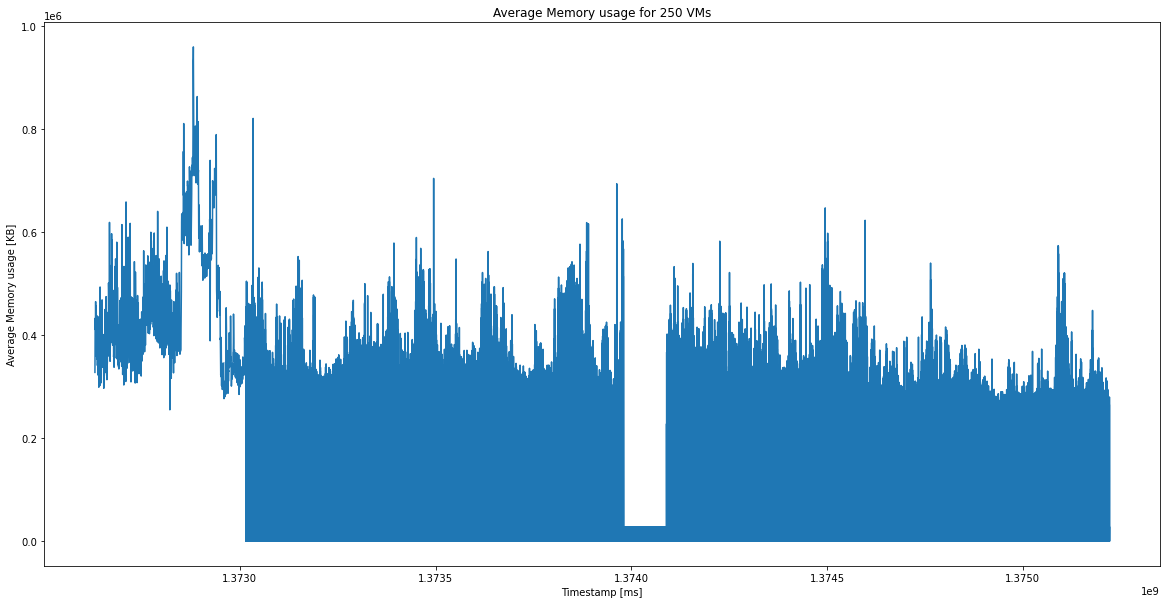

In [22]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=grouped_data["Timestamp [ms]"], y=grouped_data["Memory usage [KB]"])
plt.ylabel("Average Memory usage [KB]")
plt.title("Average Memory usage for 250 VMs")

<AxesSubplot:>

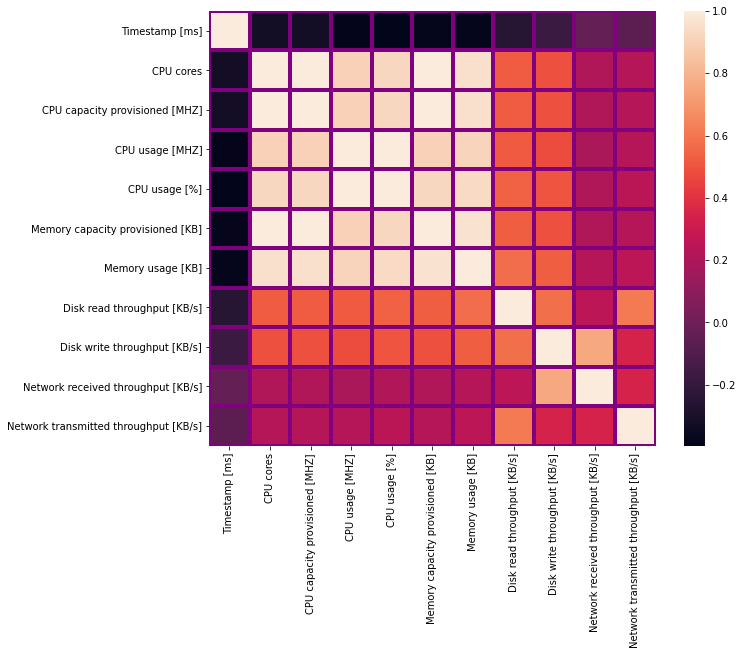

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data.corr(),linewidths=4, linecolor='purple')

Text(0.5, 1.0, 'Average CPU usage for 250 VMs in %')

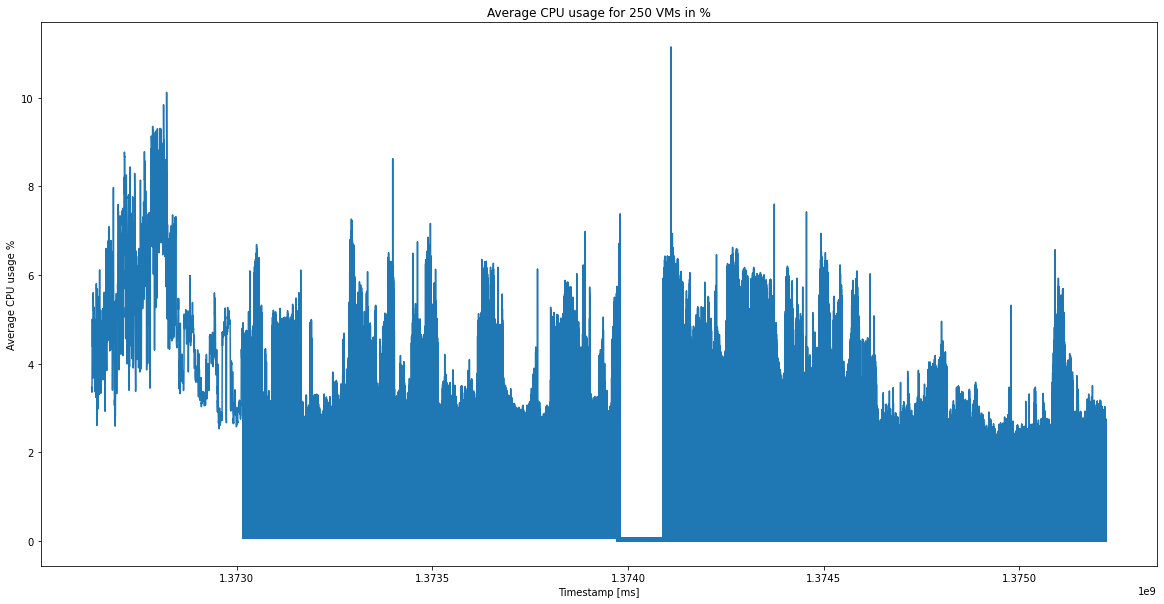

In [24]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=grouped_data["Timestamp [ms]"], y=grouped_data["CPU usage [%]"])
plt.ylabel("Average CPU usage %")
plt.title("Average CPU usage for 250 VMs in %")

In [25]:
file_1 = pd.read_csv("./rnd/2013-7/1.csv", delimiter=";")

In [26]:
file_1.columns = file_1.columns.str.replace("\t", "")

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNetCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

Text(0.5, 1.0, 'Average CPU usage for 250 VMs in %')

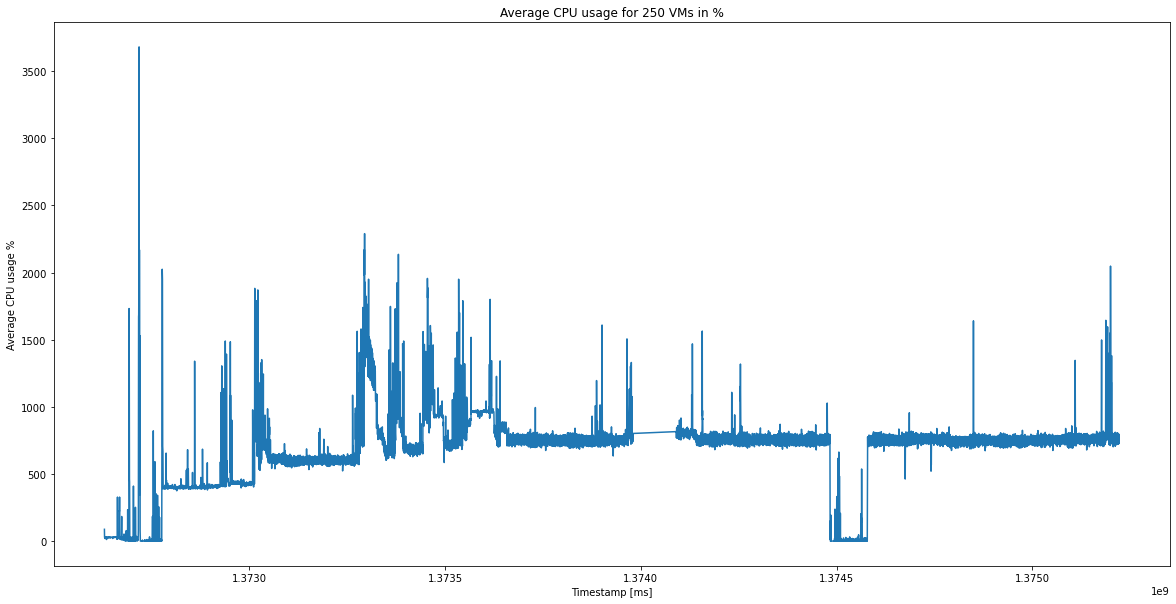

In [28]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=file_1["Timestamp [ms]"], y=file_1["CPU usage [MHZ]"])
plt.ylabel("Average CPU usage %")
plt.title("Average CPU usage for 250 VMs in %")

In [5]:
path = "./faststore/"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter=";")
    li.append(df)

new_df = pd.concat(li, axis=0, ignore_index=True)

In [6]:
def data_prep(df):
    # df.columns = df.columns.str.replace("\t", "")
    # df["Timestamp [ms]"] = df["Timestamp [ms]"] * 0.001
    # df = df.sort_values("Timestamp [ms]")
    # df = df.set_index('Timestamp [ms]')
    df = df[['CPU usage [MHZ]']]

    for i in range(1, 900):
        df[f"CPU usage [MHZ] {i}"] = df["CPU usage [MHZ]"].shift(i)
    
    df = df.dropna()

    test = df.tail(int(df.shape[0]*0.2))
    train = df.head(int(df.shape[0]*0.8))

    x_train = train.drop('CPU usage [MHZ]', axis=1)
    y_train = train['CPU usage [MHZ]']

    x_test = test.drop('CPU usage [MHZ]', axis=1)
    y_test = test['CPU usage [MHZ]']

    return x_train, x_test, y_train, y_test

In [7]:
new_df.columns = new_df.columns.str.replace("\t", "")
new_df = new_df.sort_values("Timestamp [ms]")

In [8]:
new_df["Timestamp [ms]"] = new_df["Timestamp [ms]"] * 0.001

In [9]:
new_df = new_df.groupby("Timestamp [ms]").mean()

In [10]:
new_df

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
Timestamp [ms],,,,,,,,,,
1376314.846,3.123382,8356.553462,1259.701781,9.683054,1.053282e+07,773476.700834,198.595628,69.522462,211.028530,26.596721
1376315.146,3.123382,8356.553465,1311.073134,9.811374,1.053284e+07,713465.677165,193.609664,69.121133,212.718070,37.768633
1376315.446,3.123382,8356.553465,1213.854216,9.095303,1.053285e+07,706308.206336,215.139948,78.625490,224.627470,29.924446
1376315.746,3.123382,8356.553464,935.206829,7.343816,1.053287e+07,711822.267357,186.974748,74.515024,105.062176,30.699122
1376316.046,3.123382,8356.553464,910.185790,7.133512,1.053290e+07,732891.662698,185.846419,79.697210,180.290940,38.657751
...,...,...,...,...,...,...,...,...,...,...
1378906.760,0.000000,0.000000,7.406060,0.063131,6.355006e+05,0.000000,0.000000,0.026263,0.002331,0.046620
1378906.782,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1378906.788,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 1080x864 with 0 Axes>

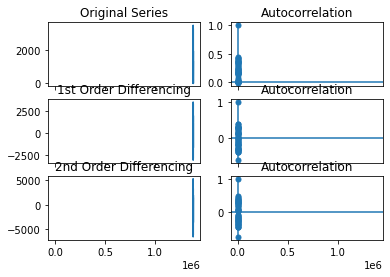

In [35]:
# Original Series
plt.figure(figsize=(15,12))
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(new_df["CPU usage [MHZ]"]); axes[0, 0].set_title('Original Series')
plot_acf(new_df["CPU usage [MHZ]"], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(new_df["CPU usage [MHZ]"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(new_df["CPU usage [MHZ]"].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(new_df["CPU usage [MHZ]"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(new_df["CPU usage [MHZ]"].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [11]:
x_train, x_test, y_train, y_test = data_prep(new_df)

/tmp/ipykernel_5342/3512080552.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"CPU usage [MHZ] {i}"] = df["CPU usage [MHZ]"].shift(i)
/tmp/ipykernel_5342/3512080552.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"CPU usage [MHZ] {i}"] = df["CPU usage [MHZ]"].shift(i)
/tmp/ipykernel_5342/3512080552.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [12]:
def get_model_score(pipeline, X_train, X_test, y_train, y_test):
    
    pipeline.fit(X_train, y_train)
    
    r2_score_train = r2_score(y_train, pipeline.predict(X_train))
    r2_score_test = r2_score(y_test, pipeline.predict(X_test))
    
    mse_train = mean_absolute_error(y_train, pipeline.predict(X_train))
    mse_test = mean_absolute_error(y_test, pipeline.predict(X_test))
    
    
    print("R2 score_train: ", r2_score_train)
    print("R2 score_test: ", r2_score_test)
    print("Train Mean Squeare Error: ", mse_train)
    print("Test Mean Squeare Error: ", mse_test)


In [13]:
get_model_score(LinearRegression(), x_train, x_test, y_train, y_test)

R2 score_train:  0.8911597996132735
R2 score_test:  -0.9416248654379547
Train Mean Squeare Error:  88.13437790533325
Test Mean Squeare Error:  157.84508176119448


In [14]:
get_model_score(ElasticNet(), x_train, x_test, y_train, y_test)

R2 score_train:  0.8911596815735334
R2 score_test:  -0.9366438593966584
Train Mean Squeare Error:  88.108121679019
Test Mean Squeare Error:  157.65282851635914


In [ ]:
get_model_score(DecisionTreeRegressor(), x_train, x_test, y_train, y_test)

R2 score_train:  1.0
R2 score_test:  0.25825181095709504
Train Mean Squeare Error:  9.733470427424935e-10
Test Mean Squeare Error:  36.43142530251714


In [15]:
get_model_score(LGBMRegressor(), x_train.to_numpy(), x_test.to_numpy(), y_train, y_test)

R2 score_train:  0.9738362070356025
R2 score_test:  0.43225607069434857
Train Mean Squeare Error:  24.850497943633957
Test Mean Squeare Error:  43.18075468973235


In [ ]:
y_test

Timestamp [ms]
1378682.892       0.000000
1378682.897       0.000000
1378682.921      25.999999
1378682.933       0.000000
1378682.939       0.000000
                  ...     
1378906.760       7.406060
1378906.782       0.000000
1378906.788       0.000000
1378906.790       0.000000
1378906.798    1294.617704
Name: CPU usage [MHZ], Length: 12446, dtype: float64

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPU usage [MHZ]', ylabel='Density'>

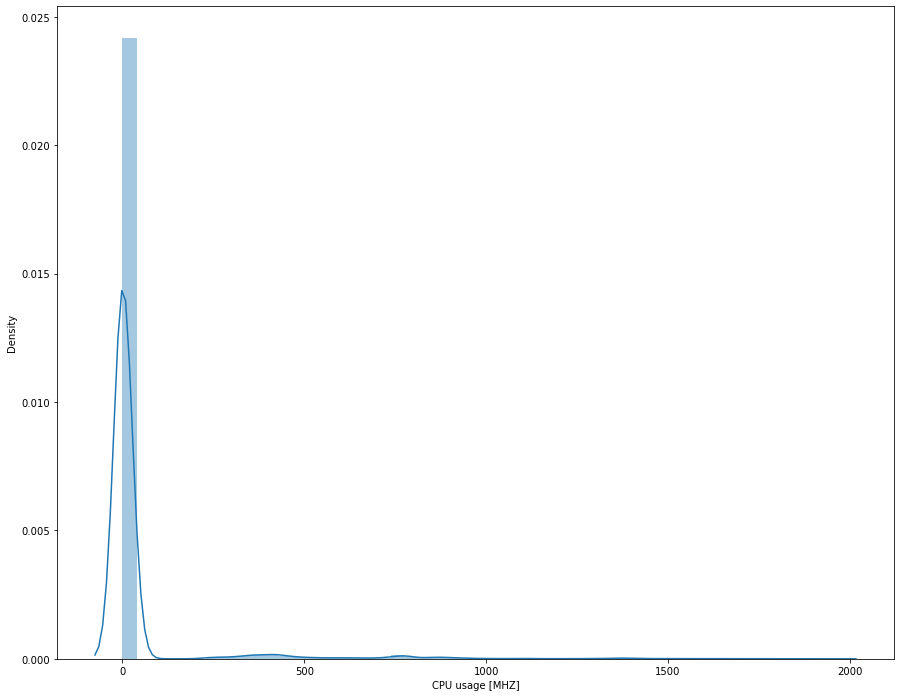

In [ ]:
plt.figure(figsize=(15,12))
sns.distplot(y_test)

In [16]:
def get_score(pipeline, X_train, X_test, y_train, y_test):
    
    
    r2_score_train = r2_score(y_train, pipeline.predict(X_train))
    r2_score_test = r2_score(y_test, pipeline.predict(X_test))
    
    mse_train = mean_absolute_error(y_train, pipeline.predict(X_train))
    mse_test = mean_absolute_error(y_test, pipeline.predict(X_test))
    
    
    print("R2 score_train: ", r2_score_train)
    print("R2 score_test: ", r2_score_test)
    print("Train Mean Squeare Error: ", mse_train)
    print("Test Mean Squeare Error: ", mse_test)

In [ ]:
get_score(model, x_train.to_numpy(), x_test.to_numpy(), y_train, y_test)

R2 score_train:  0.9394761519175422
R2 score_test:  0.8487030355258972
Train Mean Squeare Error:  15.559297296038688
Test Mean Squeare Error:  491.5095135426881


In [ ]:
x_train.shape[1]

899

In [25]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer="adam")
model_lstm.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [26]:
cnn_history = model_cnn.fit(x_train, y_train, epochs=40)


Epoch 1/40


2022-05-07 20:16:18.064183: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 358046528 exceeds 10% of free system memory.


ValueError: in user code:

    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 899)


In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=3)